## 5.1 Linear SVM Classification

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

import os

if os.name == 'posix':
    plt.rc('font', family = 'AppleGothic')

In [2]:
iris = datasets.load_iris()
X = iris["data"][:,(2,3)] #꽃잎 길이, 너비
y = (iris["target"] == 2).astype(np.float64) #Iris-Virginica

In [3]:
svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge"))
])

svm_clf.fit(X,y)

# svm_clf = Pipeline([
#     ("scaler", StandardScaler()),
#     ("linear_svc", SVC(kernel="linear", C=1))
# ])

# svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [4]:
# svm_clf = Pipeline([
#     ("scaler", StandardScaler()),
#     ("linear_svc", SGDClassifier(loss = "hinge", alpha=1/(m*C)))
# ])
# m은 sample 수



In [5]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

## 5.2 Non-Linear SVM Classification

In [6]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

X,y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X,y)

/Applications/anaconda3/envs/shrm_study/lib/python3.7/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [7]:
import matplotlib.pyplot as plt

In [8]:
def plot_dataset(X, y, axes):
    plt.plot(X[:,0][y==0], X[:,1][y==0],'bs')
    plt.plot(X[:,0][y==1], X[:,1][y==1],'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r'x1',fontsize=20)
    plt.ylabel(r'x2',fontsize=20, rotation=0)

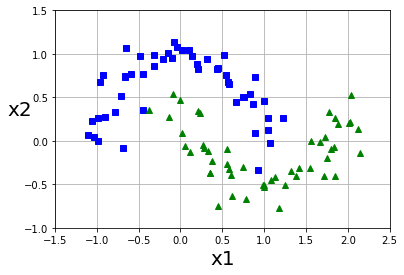

In [16]:
X1D = np.linspace(-4, 4, 9).reshape(-1,1)
X2D = np.c_[X1D, X1D**2]

plot_dataset(X,y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[0], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contour(x0, x1, y_pred, cmap = plt.cm.brg, alpha = 0.2)
    plt.contour(x0, x1, y_decision, cmap = plt.cm.brg, alpha=0.1)

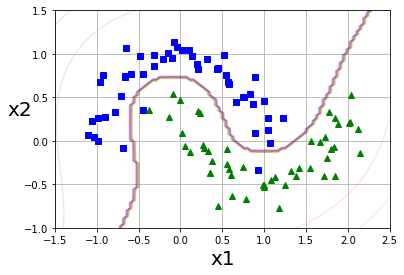

In [11]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X,y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [12]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf.fit(X,y)

poly100_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100,  C=5))
])

poly100_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

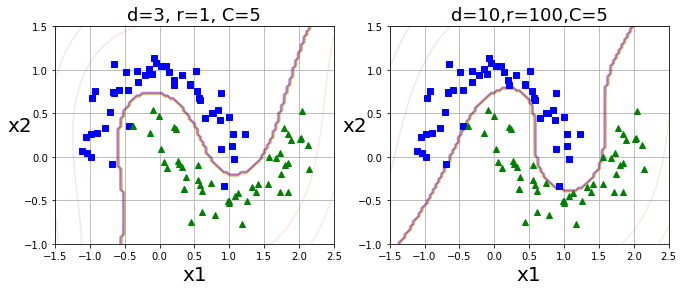

In [13]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_predictions(poly_kernel_svm_clf, [-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r'd=3, r=1, C=5',fontsize=18)

plt.subplot(122)
plot_predictions(poly100_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])
plt.title(r'd=10,r=100,C=5',fontsize=18)
plt.show()

In [14]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
])

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

/Applications/anaconda3/envs/shrm_study/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/envs/shrm_study/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/envs/shrm_study/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Applications/anaconda3/envs/shrm_study/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0, flags=flags)
/Applications/anaconda3/envs/shrm_study/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
/App

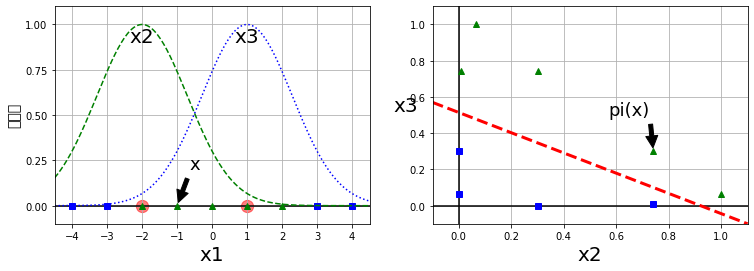

In [21]:
def gaussian_rbf(x,landmark,gamma):
    return np.exp(-gamma*np.linalg.norm(x-landmark,axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1,1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])



plt.figure(figsize=(11,4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2,1], y=[0,0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:,0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:,0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"x1", fontsize=20)
plt.ylabel(r"유사도", fontsize=14)
plt.annotate(r'x',
             xy=(X1D[3,0],0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18
             )
plt.text(-2, 0.9, "x2", ha="center", fontsize=20)
plt.text(1, 0.9, "x3", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:,0][yk==0], XK[:,1][yk==0], "bs")
plt.plot(XK[:,0][yk==1], XK[:,1][yk==1], "g^")
plt.xlabel(r"x2", fontsize=20)
plt.ylabel(r"x3", fontsize=20, rotation=0)
plt.annotate(r'pi(x)',
             xy=(XK[3,0], XK[3,1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18
             )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])

plt.subplots_adjust(right=1)
plt.show()

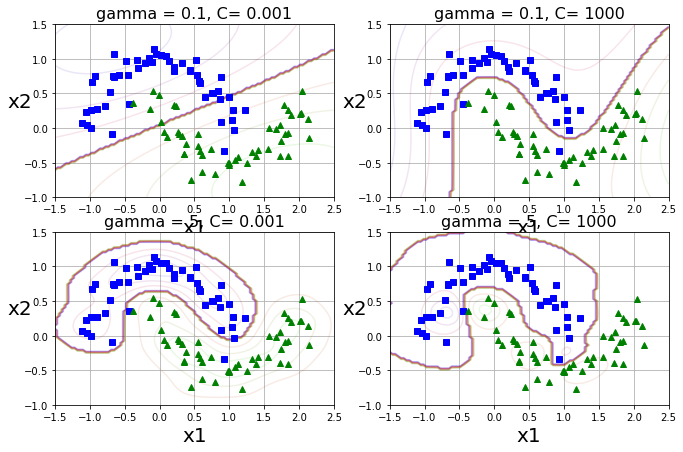

In [33]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs=[]

for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
        ('scaler', StandardScaler()),
        ('svm_clf', SVC(kernel='rbf',gamma = gamma, C=C))
    ])
    rbf_kernel_svm_clf.fit(X,y)
    svm_clfs.append(rbf_kernel_svm_clf)
    
plt.figure(figsize=(11,7))

for i, svm_clf in enumerate(svm_clfs):
    plt.subplot(221+i)
    plot_predictions(svm_clf, [-1.5,2.5,-1,1.5])
    plot_dataset(X,y,[-1.5,2.5,-1,1.5])
    gamma, C = hyperparams[i]
    plt.title(r'gamma = {}, C= {}'.format(gamma,C), fontsize=16)

plt.show()

#gamma는 클수록 좁은 종모양, 작을수록 넓은 종모양을 가지는 hyperparameter
#C는 클수록 Margin이 작아짐. 즉, 도로폭이 좁아지는 hyperparameter

## 5.3 SVM Regression

In [29]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
m = 50
X = 2 * np.random.rand(m,1)
y = (4+3*X-np.random.rand(m,1)).ravel()


In [30]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X,y)
a = svm_reg.predict(X)
a

array([4.73473449, 8.14056493, 6.84768425, 6.05952336, 3.44302944,
       3.44288687, 2.86412447, 7.64085035, 6.07404417, 6.70628238,
       2.64246297, 8.25403196, 7.44144781, 3.77594608, 3.59557354,
       3.6049104 , 4.31919583, 5.62268001, 5.07406131, 4.24227392,
       6.137517  , 3.34534961, 4.24768559, 4.68639178, 5.21666669,
       7.16204915, 3.7010799 , 5.56048333, 6.02261487, 2.79535932,
       6.11205168, 3.52877299, 2.90531299, 8.12975487, 8.22874529,
       7.29931338, 4.32139197, 3.09813656, 6.56536411, 5.12257662,
       3.24216744, 5.44783213, 2.72406012, 7.89588091, 4.05046329,
       6.43702947, 4.36334495, 5.59496629, 5.75245168, 3.61348119])

Text(0.5, 1.0, 'epsilon = 0.5')

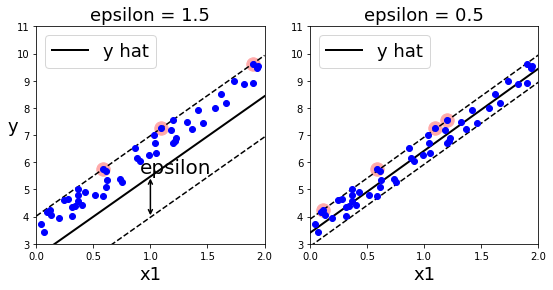

In [48]:
svm_reg1 = LinearSVR(epsilon = 1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon = 0.5, random_state=42)
svm_reg1.fit(X,y)
svm_reg2.fit(X,y)

def find_support_vectors(svm_reg,X,y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y-y_pred)>=svm_reg.epsilon)
    #off_margin은 실제 y값과 예측값 사이의 오차를 절대값으로 표현하는 것으로, 해당 모형의 epsilon보다 크거나 값은 값으로 설정하면 True/False가 반환됨
    return np.argwhere(off_margin) #np.argwhere는 행렬에서 True에 해당하는 값 위치를 반환
#=> 따라서, 오차가 epsilon보다 큰 값들의 위치를 반환하며 이것들이 서포트 벡터로 활용됨.
#=> epsilon보다 큰 벡터들로 SVM을 하면, 만들어지는 도로가 Support Vector들을 포함하지 않게 되고, 이는 Margin 내에 있는 벡터들을 포함하는 도로가 될 것.

svm_reg1.support_ = find_support_vectors(svm_reg1,X,y)
svm_reg2.support_ = find_support_vectors(svm_reg2,X,y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

def plot_svm_regression(svm_reg, X,y, axes):
    x1s = np.linspace(axes[0], axes[1], 2).reshape(2,1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, 'k-',linewidth=2, label=r'y hat')
    plt.plot(x1s, y_pred+svm_reg.epsilon,'k--')
    plt.plot(x1s, y_pred-svm_reg.epsilon,'k--')
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X,y,'bo')
    plt.xlabel(r'x1',fontsize=18)
    plt.legend(loc='upper left', fontsize=18)
    plt.axis(axes)
    
plt.figure(figsize=(9,4))
plt.subplot(121)
plot_svm_regression(svm_reg1, X,y, [0,2,3,11])
plt.title(r'epsilon = {}'.format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r'y',fontsize=18,rotation=0)
# plt.plot([eps_x1, eps_x1],[eps_y_pred, eps_y_pred-svm_reg1.epsilon],'k-',linewidth=2)

plt.annotate(
    '', xy = (eps_x1, eps_y_pred), xycoords='data',
    xytext = (eps_x1, eps_y_pred-svm_reg1.epsilon),
    textcoords='data', arrowprops={'arrowstyle':'<->','linewidth':1.5})

plt.text(0.91, 5.6, r'epsilon',fontsize=20)
plt.subplot(122)
plot_svm_regression(svm_reg2, X,y, [0,2,3,11])
plt.title(r'epsilon = {}'.format(svm_reg2.epsilon),fontsize=18)